In [1]:
print('Добро пожаловать в VOGTD: visualization of global temperature data(визуализацию мировых данных о температуре)')

Добро пожаловать в VOGTD: visualization of global temperature data(визуализацию мировых данных о температуре)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
data = pd.read_csv('data/GlobalTemperatures.txt', sep=",")

In [4]:
# Размер датасета - 3192 строк, 9 колонок
data.shape

(3192, 9)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 3192


In [6]:
# Список колонок
data.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [7]:
# Список колонок с типами данных
data.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

dt - 0
LandAverageTemperature - 12
LandAverageTemperatureUncertainty - 12
LandMaxTemperature - 1200
LandMaxTemperatureUncertainty - 1200
LandMinTemperature - 1200
LandMinTemperatureUncertainty - 1200
LandAndOceanAverageTemperature - 1200
LandAndOceanAverageTemperatureUncertainty - 1200


In [9]:
# Основные статистические характеристки набора данных
data.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


Text(0, 0.5, 'Максимальное значение температуры')

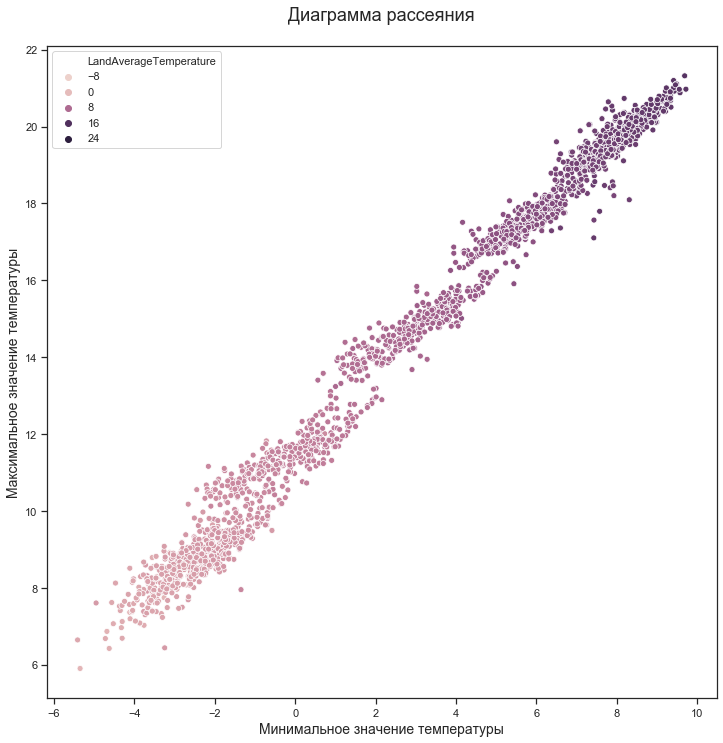

In [10]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.scatterplot(ax=ax, x='LandMinTemperature', y='LandMaxTemperature', data=data, hue='LandAverageTemperature')
plt.legend()
plt.title(r'Диаграмма рассеяния', fontsize=18, y=1.03);

plt.xlabel('Минимальное значение температуры', fontsize=14)
plt.ylabel('Максимальное значение температуры', fontsize=14)

Text(0, 0.5, '95% доверительный интервал от максимального значения температуры')

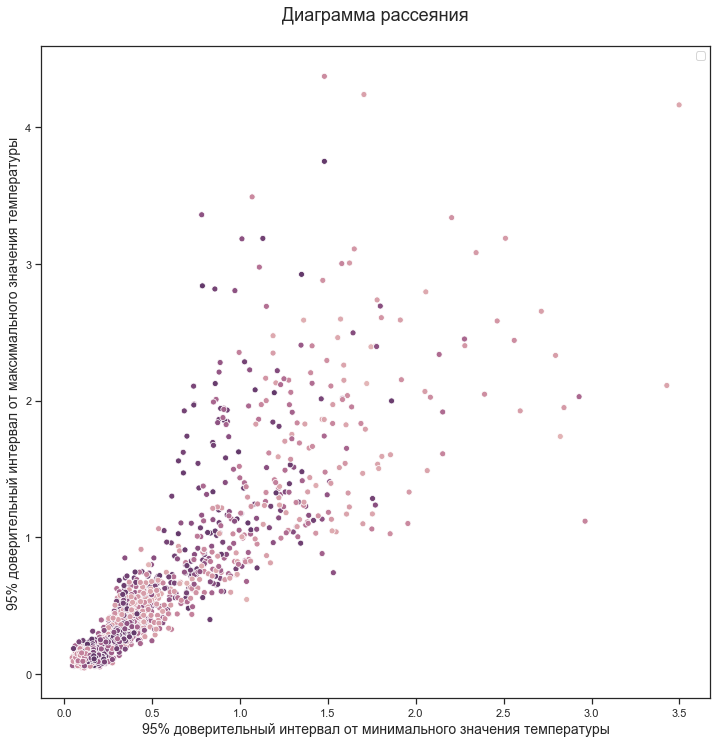

In [11]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.scatterplot(ax=ax, x='LandMinTemperatureUncertainty', y='LandMaxTemperatureUncertainty', data=data, hue='LandAverageTemperature')

plt.legend('')
plt.title(r'Диаграмма рассеяния', fontsize=18, y=1.03);

plt.xlabel('95% доверительный интервал от минимального значения температуры', fontsize=14)
plt.ylabel('95% доверительный интервал от максимального значения температуры', fontsize=14)

Text(0, 0.5, 'Плотность вероятности распределения данных')

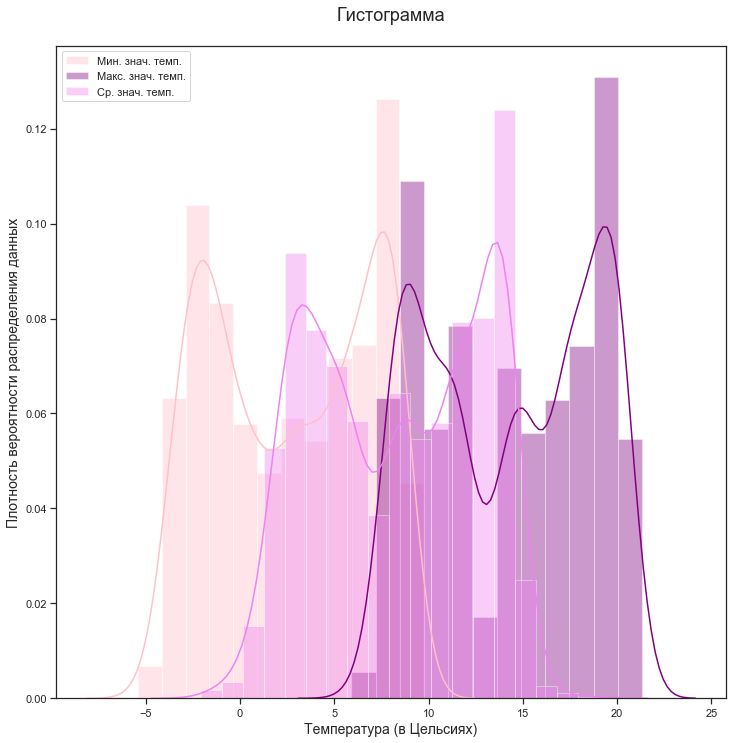

In [12]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.distplot(data['LandMinTemperature'], label = u'Мин. знач. темп.', color='pink')
sns.distplot(data['LandMaxTemperature'], label = u'Макс. знач. темп.', color='purple')
sns.distplot(data['LandAverageTemperature'], label = u'Ср. знач. темп.', color='violet')

plt.legend()

plt.title(r'Гистограмма', fontsize=18, y=1.03);

plt.xlabel('Температура (в Цельсиях)', fontsize=14)
plt.ylabel('Плотность вероятности распределения данных', fontsize=14)

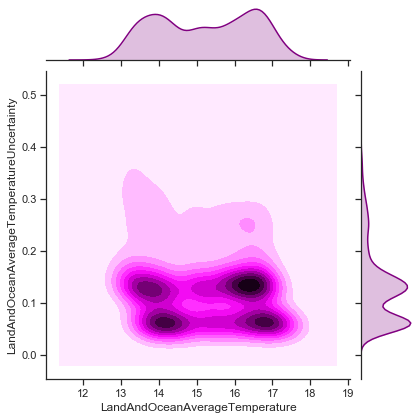

In [13]:
sns.jointplot(x='LandAndOceanAverageTemperature', y='LandAndOceanAverageTemperatureUncertainty', data=data, color='purple', kind="kde")

In [ ]:
sns.pairplot(data)

In [ ]:
data.corr()

In [ ]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

In [ ]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')